In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [22]:
Vibration=pd.read_csv("../input/engine-vibrations/vibrations.csv")

**1. TO UNDERSTAND AND GET MORE INFORMATION ABOUT THE DATA**

In [23]:
#To describe the data
Vibration .describe

<bound method NDFrame.describe of             mm
0    -1.031900
1     0.651533
2    -0.581850
3    -0.538830
4     0.971045
...        ...
9995 -1.047985
9996 -2.034905
9997 -2.297491
9998  0.295287
9999  0.110247

[10000 rows x 1 columns]>

In [24]:
#To get the first 10 data
Vibration.head(10)

,mm
0,-1.031900
1,0.651533
2,-0.581850
3,-0.538830
4,0.971045
5,-0.517187
6,-0.805698
7,0.713966
8,-0.800915
9,-0.766572


**mm column means we are dealing with displacement**

In [25]:
Vibration.describe()

,mm
count,10000.000000
mean,-0.000469
std,1.225200
min,-2.961817
25%,-0.872625
50%,0.040445
75%,0.876027
max,3.022369


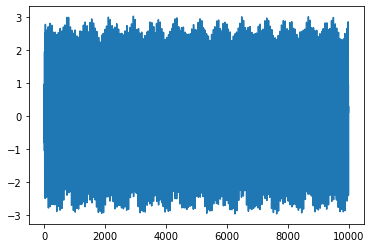

In [26]:
plt.plot(Vibration)

**WORKING WITH THE FIRST 2000 VALUES:**

In [27]:
First_2000 = Vibration[0:2000] 

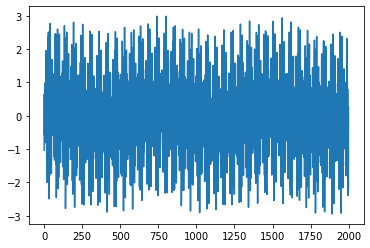

In [28]:
plt.plot(First_2000)

**Plotting the fast fourier graph (Frequency) to make sense of the first 2000 values**

In [29]:
#fast fourier transform
from numpy.fft import fft, fftfreq, ifft

fft2000= np.fft.fftfreq(2000,First_2000.mm)

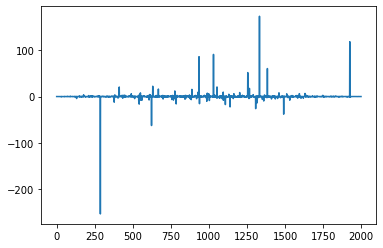

In [30]:
plt.plot(fft2000)

In [31]:
fs = 5
# sampling frequency 
fmax = 25
# sampling period
dt = 1/fs
# length of signal
N  = 75

df = fmax/N
f = np.arange(0,N)*df

xf = np.fft.fft(First_2000.mm)*dt


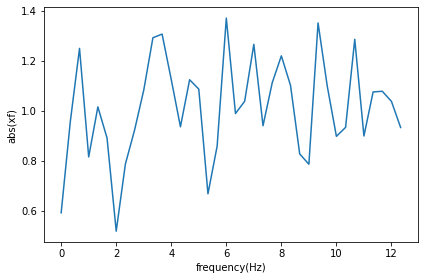

In [32]:
# A better way to view the data

plt.plot(f[0:int(N/2+1)],np.abs(xf[0:int(N/2+1)]))
plt.xlabel('frequency(Hz)'); 
plt.ylabel('abs(xf)');
plt.tight_layout()

**COMPARISON OF THE NORMAL GRAPH TO THE FOURIER TRANSFORM TO VIEW ABNORMALITIES PROPERLY**

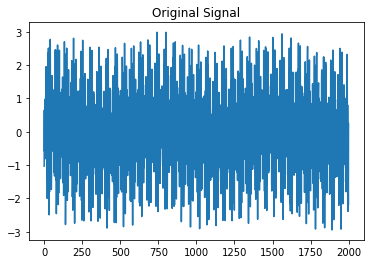

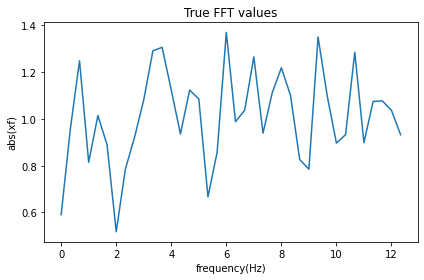

In [33]:
# To compare the normal line plot to the fast fourier transform
plt.figure(1)
plt.title('Original Signal')
plt.plot(First_2000)

plt.figure(2)
plt.plot(f[0:int(N/2+1)],np.abs(xf[0:int(N/2+1)]))
plt.title('True FFT values')
plt.xlabel('frequency(Hz)'); 
plt.ylabel('abs(xf)');
plt.tight_layout()

**COMPARISON OF THE NORMAL GRAPH TO THE FOURIER TRANSFORM OF THE FIRST 1000 VALUES**

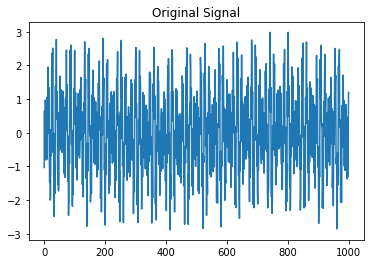

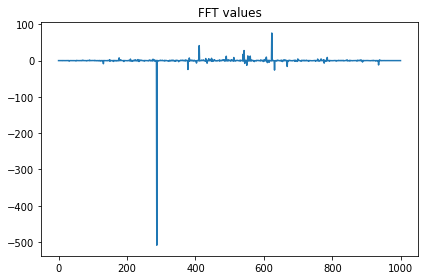

In [34]:
# To compare the normal line plot to the fast fourier transform of the first 1000
First_1000 = Vibration[0:1000]
fft1000= np.fft.fftfreq(1000,First_1000.mm)

plt.figure(1)
plt.title('Original Signal')
plt.plot(First_1000)

plt.figure(2)
plt.plot(fft1000)
plt.title('FFT values')
plt.tight_layout()

**With the FFT we can easily detect abnormalities in the system/data. The spikes in the graph represents a problem or anomaly in the engine.**